In [1]:
!pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

     |████████████████████████████████| 211 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 7.0 MB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 29.4 MB 381 kB/s eta 0:00:011
     |████████████████████████████████| 180 kB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 156 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 211 kB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 8.5 MB/s  eta 0:00:01


In [5]:
!pip install protobuf==3.19.0 grpcio-status google-api-core tqdm

     |████████████████████████████████| 78 kB 6.5 MB/s  eta 0:00:01


In [29]:
import os
from google.cloud import bigquery
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [34]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "data-science-349808-9fc5e21fc770.json"

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = None

plt.style.use("dark_background")

In [13]:

bqclient = bigquery.Client()

# Download query results.
article_query_string = """
    SELECT * 
    FROM data-science-349808.the_bridge_retailer.article;
"""

articles_df = (
    bqclient.query(article_query_string)
    .result()
    .to_dataframe(
        create_bqstorage_client = True,
    )
)

In [27]:
articles_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  Int64 
 1   product_code                  105542 non-null  Int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  Int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  Int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  Int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  Int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  Int64 
 13 

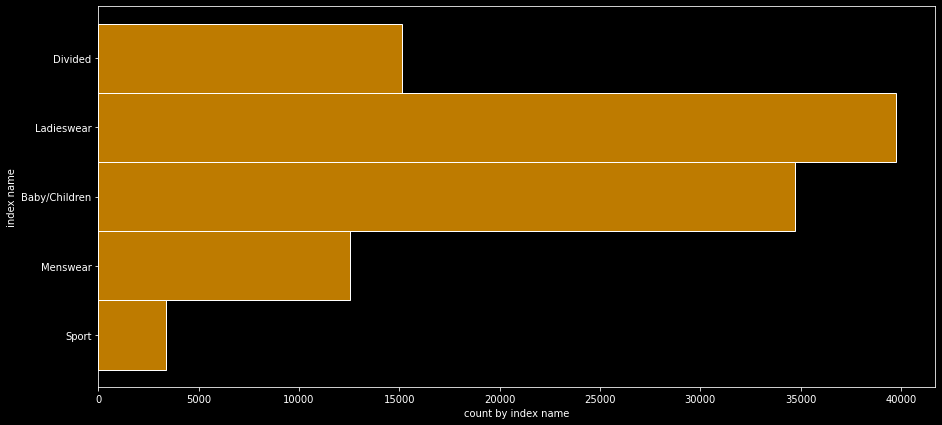

In [35]:
f, ax = plt.subplots(figsize = (15, 7))
ax = sns.histplot(data = articles_df, 
    y = 'index_group_name', color = 'orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

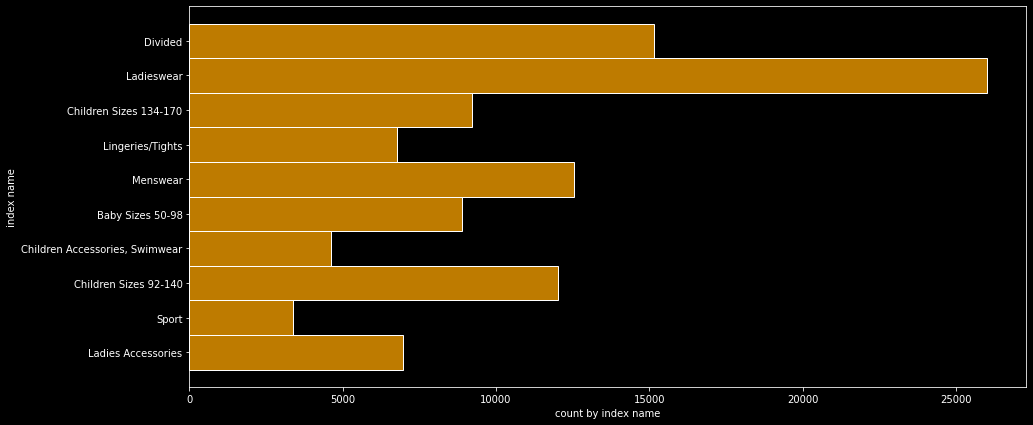

In [36]:
f, ax = plt.subplots(figsize = (15, 7))
ax = sns.histplot(data = articles_df, 
    y = 'index_name', color = 'orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

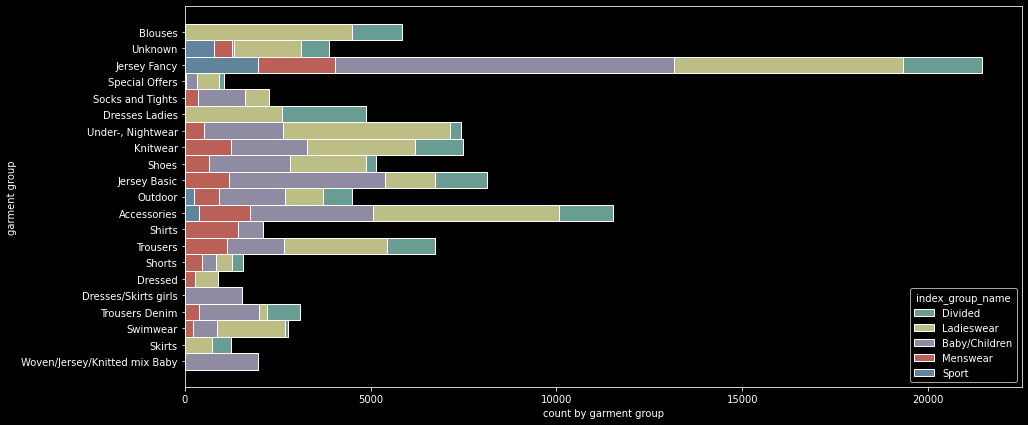

In [37]:
f, ax = plt.subplots(figsize = (15, 7))
ax = sns.histplot(data = articles_df, 
    y = 'garment_group_name', color='orange', 
    hue = 'index_group_name', multiple = "stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [32]:
articles_df.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [39]:
articles_df.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [41]:
for col in articles_df.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles_df[col].nunique()
        print('Unique {0}: {1}'.format(col, un_n))

Unique prod_name: 45875
Unique product_type_name: 131
Unique product_group_name: 19
Unique graphical_appearance_name: 30
Unique colour_group_name: 50
Unique perceived_colour_value_name: 8
Unique perceived_colour_master_name: 20
Unique department_name: 250
Unique index_name: 10
Unique index_group_name: 5
Unique section_name: 56
Unique garment_group_name: 21
Unique detail_desc: 43404
